In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv("Mall_Customers.csv")

In [10]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [13]:
sse = []
for i in range(2,21):
    kmeans = KMeans(n_clusters = i, random_state=1)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_in

Text(0.5, 1.0, 'Elbow Diagram')

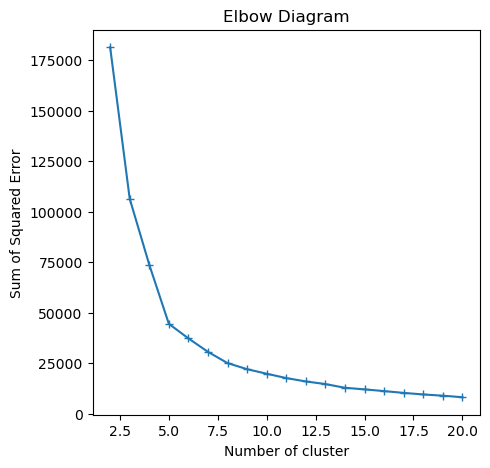

In [14]:
plt.figure(figsize=(5,5))
plt.plot(range(2,21), sse, marker='+')
plt.xlabel("Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.title("Elbow Diagram")

In [15]:
chosen_clusters = 5
kmeans = KMeans(n_clusters = chosen_clusters, random_state=1)
kmeans.fit(X)

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [20]:
 df['clusters'] = kmeans.labels_
df['clusters']


0      4
1      0
2      4
3      0
4      4
      ..
195    3
196    1
197    3
198    1
199    3
Name: clusters, Length: 200, dtype: int32

In [17]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


Text(0.5, 1.0, 'Clusters')

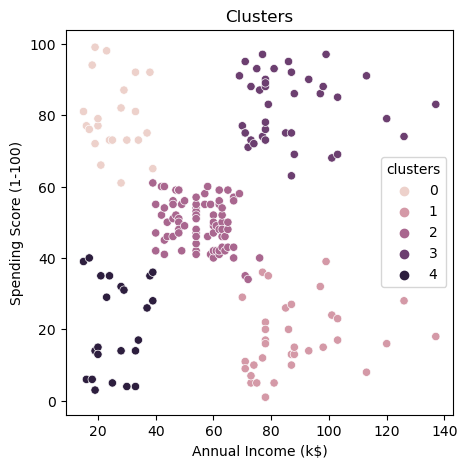

In [18]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue='clusters', data=df)
plt.title('Clusters')